<a href="https://colab.research.google.com/github/Hirenr12/DASCASSIGNMENT2QUESTION7/blob/main/DASCAssignment2Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for data handling, analysis, and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Google Colab files.upload(): Allows manual uploading of local files in Colab (GeeksforGeeks, 2024)
from google.colab import files
uploaded = files.upload()
# Load the dataset
df = pd.read_csv('exchange-rates_zaf.csv')

Saving exchange-rates_zaf.csv to exchange-rates_zaf.csv


**Initial Data Exploration**

In [34]:
# Initial Data Exploration (Ozdemir, 2016)
print("=" * 50)
print("INITIAL DATA EXPLORATION")
print("=" * 50)
# Display dataset schema
print("\n1. DATASET SCHEMA:")
print(df.info())

INITIAL DATA EXPLORATION

1. DATASET SCHEMA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Iso3               759 non-null    object 
 1   StartDate          759 non-null    object 
 2   EndDate            759 non-null    object 
 3   Area Code          758 non-null    float64
 4   Area Code (M49)    758 non-null    object 
 5   Area               759 non-null    object 
 6   Element Code       758 non-null    object 
 7   Element            758 non-null    object 
 8   ISO Currency Code  758 non-null    object 
 9   Currency           758 non-null    object 
 10  Year Code          758 non-null    float64
 11  Year               759 non-null    object 
 12  Months Code        758 non-null    float64
 13  Months             758 non-null    object 
 14  Unit               1 non-null      object 
 15  Value              759 non-nu

Displaying the First 10 Rows

In [35]:
print("\n2. FIRST 10 ROWS:")
print(df.head(5))


2. FIRST 10 ROWS:
            Iso3    StartDate     EndDate  Area Code Area Code (M49)  \
0  #country+code  #date+start   #date+end        NaN             NaN   
1            ZAF   1970-01-01  1970-12-31      202.0            '710   
2            ZAF   1970-01-01  1970-01-31      202.0            '710   
3            ZAF   1970-02-01  1970-02-28      202.0            '710   
4            ZAF   1970-03-01  1970-03-31      202.0            '710   

            Area Element Code                       Element ISO Currency Code  \
0  #country+name          NaN                           NaN               NaN   
1   South Africa          LCU  Local currency units per USD               ZAR   
2   South Africa          LCU  Local currency units per USD               ZAR   
3   South Africa          LCU  Local currency units per USD               ZAR   
4   South Africa          LCU  Local currency units per USD               ZAR   

  Currency  Year Code        Year  Months Code        Months 

### Display columns

In [36]:
print("\n3. COLUMNS IN DATASET:")
print(df.columns.tolist())


3. COLUMNS IN DATASET:
['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'ISO Currency Code', 'Currency', 'Year Code', 'Year', 'Months Code', 'Months', 'Unit', 'Value', 'Flag']


### Data Cleaning and Preprocessing

In [37]:
print("\n" + "=" * 50)
print("DATA CLEANING AND PREPROCESSING")
print("=" * 50)

# Remove the header row (first row) which contains metadata
df_clean = df.iloc[1:].reset_index(drop=True)

# Convert Year and Value columns to proper data types
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
df_clean['Value'] = pd.to_numeric(df_clean['Value'], errors='coerce')

# Filter data for 2014-2023 and relevant exchange rate type
filtered_data = df_clean[
    (df_clean['Year'] >= 2014) &
    (df_clean['Year'] <= 2023) &
    (df_clean['Element'] == 'Local currency units per USD')
]

# Get annual data for analysis
annual_data = filtered_data[filtered_data['Months Code'] == 7021]

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")
print(f"Filtered data shape: {filtered_data.shape}")
print(f"Annual data points (2014-2023): {len(annual_data)}")
print("\nAnnual Exchange Rates (2014-2023):")
print(annual_data[['Year', 'Value']].reset_index(drop=True))


DATA CLEANING AND PREPROCESSING
Original data shape: (759, 17)
Cleaned data shape: (758, 17)
Filtered data shape: (130, 17)
Annual data points (2014-2023): 10

Annual Exchange Rates (2014-2023):
   Year      Value
0  2014  10.852656
1  2015  12.758931
2  2016  14.709611
3  2017  13.323801
4  2018  13.233926
5  2019  14.448427
6  2020  16.459105
7  2021  14.778678
8  2022  16.355853
9  2023  18.453422


# a. Line plot to visualise exchange rate trends

a. Line plot - Exchange rate trends



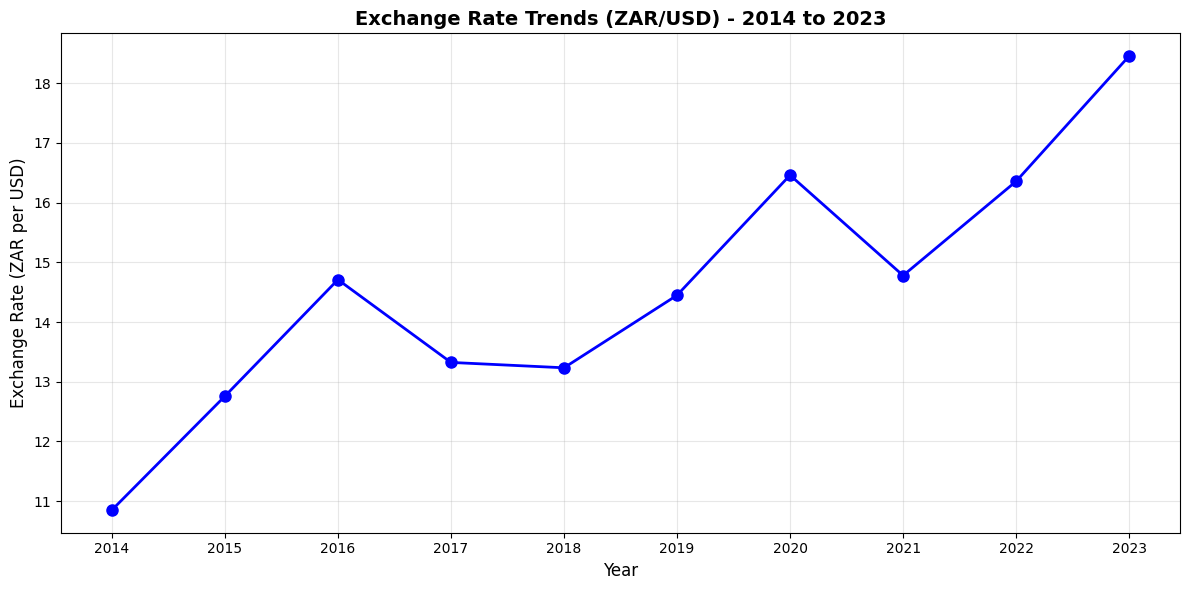


Line plot generated successfully!
Trend shows consistent increase in exchange rate from 2014 to 2023


In [58]:
# Line plots are ideal for showing temporal trends (Matplotlib, 2024)
print("a. Line plot - Exchange rate trends")
print()
plt.figure(figsize=(12, 6))
plt.plot(annual_data['Year'], annual_data['Value'], marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Exchange Rate Trends (ZAR/USD) - 2014 to 2023', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exchange Rate (ZAR per USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(annual_data['Year'])
plt.tight_layout()
plt.show()

print()
print("Line plot generated successfully!")
print("Trend shows consistent increase in exchange rate from 2014 to 2023")

## b. Scatter plot to visualise relationship

b. Scatter Polt - Relationship analysis



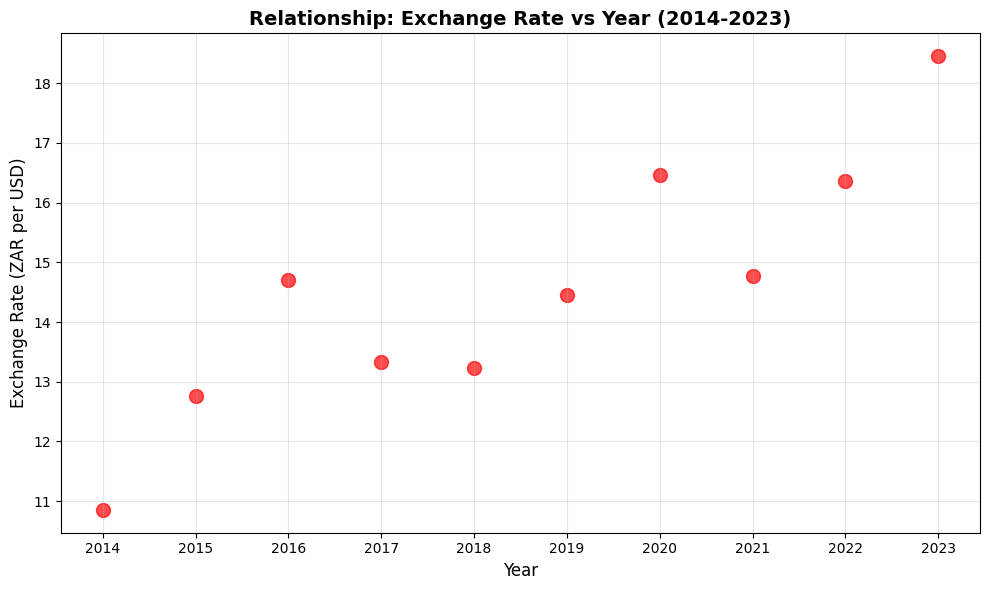


Scatter plot generated successfully.
Correlation coefficient: 0.884
Strong positive relationship between year and exchange rate


In [59]:
# Scatter plots reveal correlation between numeric variables (IBM, 2024)
print("b. Scatter Polt - Relationship analysis")
print()

plt.figure(figsize=(10, 6))
plt.scatter(annual_data['Year'], annual_data['Value'], s=100, alpha=0.7, color='red')
plt.title('Relationship: Exchange Rate vs Year (2014-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exchange Rate (ZAR per USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(annual_data['Year'])
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = np.corrcoef(annual_data['Year'], annual_data['Value'])[0,1]
print()
print(f"Scatter plot generated successfully.")
print(f"Correlation coefficient: {correlation:.3f}")
print("Strong positive relationship between year and exchange rate")

c. Histogram - Distribution Analysis

Monthly data points available: 120


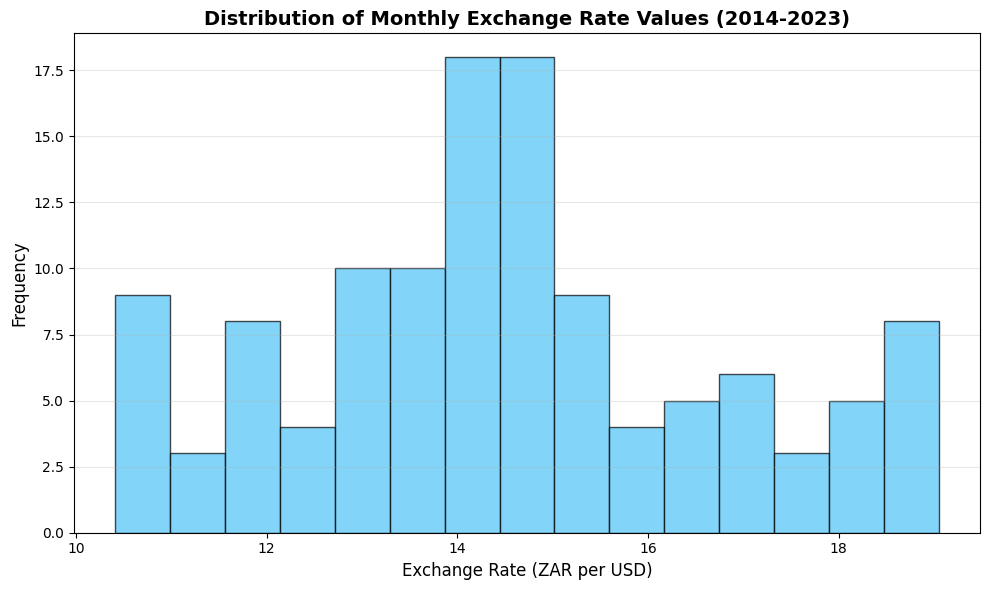


Histogram generated successfully.
Monthly data points: 120
Mean exchange rate: 14.54
Standard deviation: 2.22
Range: 10.41 to 19.05


In [60]:
# Histograms are used to visualise data frequency distributions (Matplotlib, 2024)
print("c. Histogram - Distribution Analysis")
print()

# Get monthly data for better distribution analysis
monthly_data = filtered_data[filtered_data['Months Code'] != 7021]

print(f"Monthly data points available: {len(monthly_data)}")

plt.figure(figsize=(10, 6))
plt.hist(monthly_data['Value'], bins=15, alpha=0.7, color='#4FC3F7', edgecolor='black')
plt.title('Distribution of Monthly Exchange Rate Values (2014-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Exchange Rate (ZAR per USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Distribution statistics for monthly data
print()
print("Histogram generated successfully.")
print(f"Monthly data points: {len(monthly_data)}")
print(f"Mean exchange rate: {monthly_data['Value'].mean():.2f}")
print(f"Standard deviation: {monthly_data['Value'].std():.2f}")
print(f"Range: {monthly_data['Value'].min():.2f} to {monthly_data['Value'].max():.2f}")

Results Summary



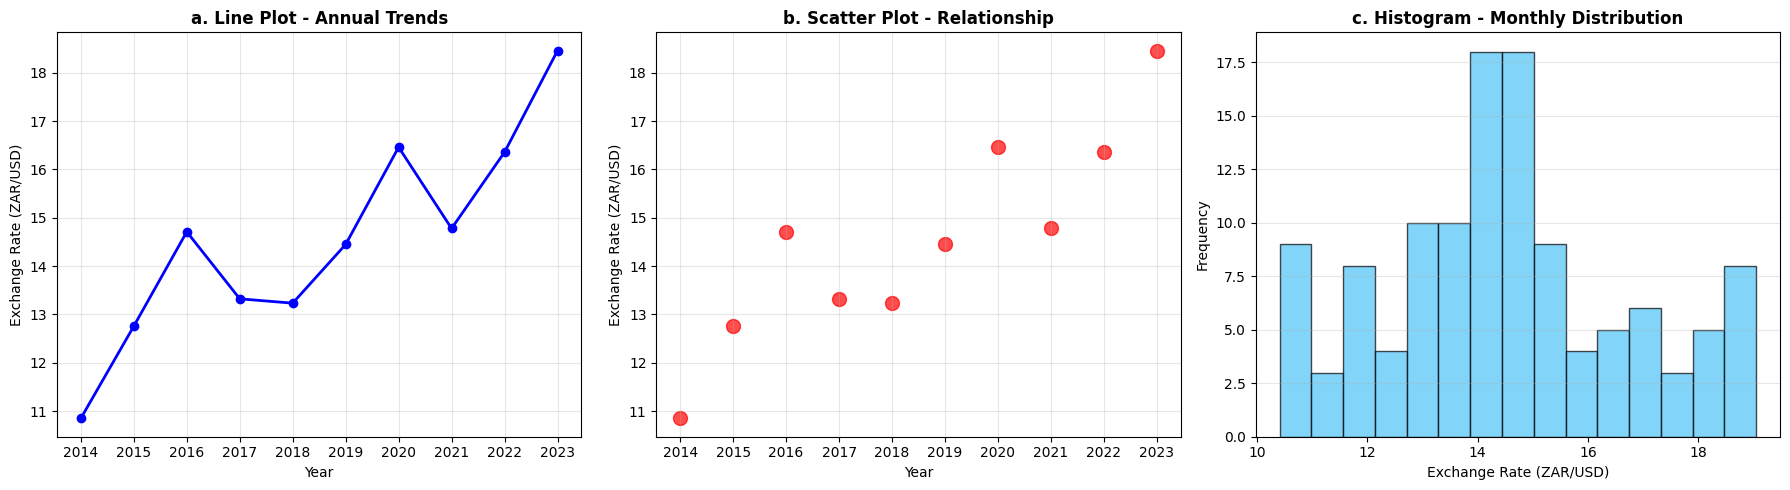


All three visualisations completed successfully!
Line plot: Shows clear upward trend using annual data
Scatter plot: Shows strong positive correlation using annual data
Histogram: Shows meaningful distribution using 120 monthly data points


In [55]:
# Multiple subplots provide comprehensive comparison of trends, relationships, and distributions (Ozdemir, 2016)
print("Results Summary")
print()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Line plot (using annual data)
axes[0].plot(annual_data['Year'], annual_data['Value'], marker='o', linewidth=2, color='blue')
axes[0].set_title('a. Line Plot - Annual Trends', fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Exchange Rate (ZAR/USD)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(annual_data['Year'])

# Scatter plot (using annual data)
axes[1].scatter(annual_data['Year'], annual_data['Value'], s=100, color='red', alpha=0.7)
axes[1].set_title('b. Scatter Plot - Relationship', fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Exchange Rate (ZAR/USD)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(annual_data['Year'])

# Histogram (using monthly data)
axes[2].hist(monthly_data['Value'], bins=15, color='#4FC3F7', alpha=0.7, edgecolor='black')
axes[2].set_title('c. Histogram - Monthly Distribution', fontweight='bold')
axes[2].set_xlabel('Exchange Rate (ZAR/USD)')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print()
print("All three visualisations completed successfully!")
print("Line plot: Shows clear upward trend using annual data")
print("Scatter plot: Shows strong positive correlation using annual data")
print("Histogram: Shows meaningful distribution using 120 monthly data points")

##Reference List:
Pandas (2024). pandas documentation — pandas 1.0.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/. [Accessed 14 October 2025]

‌Pandas (2024). pandas documentation — pandas 1.0.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/. [Accessed 14 October 2025]

‌W3schools.com. (2024). W3Schools.com. [online] Available at: https://www.w3schools.com/python/numpy/. [Accessed 14 October 2025]

‌IBM (2021). What is Data Visualization? [online] Ibm.com. Available at: https://www.ibm.com/think/topics/data-visualization. [Accessed 14 October 2025]

‌Codecademy. (n.d.). Introduction to Pandas and NumPy. [online] Available at: https://www.codecademy.com/article/introduction-to-numpy-and-pandas. [Accessed 20 Aug. 2025].

Ozdemir, S. (2016). Principles of Data Science. Birmingham: Packt Publishing.